In [151]:
# WeatherPy

#### Note
# Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st

# import API key
from api_keys import weather_api_key
from api_keys import g_key

# incorporated citipy to determine city based on lat and long
from citipy import citipy

# output file (csv)
outputDataFile = "Output/cities.csv"

# range of lat and long
lat_range = (-90, 90)
lng_range = (-180, 180)




In [152]:
## Generate Cities List

lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique add to cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

618

In [14]:
cities[0:15]

['janossomorja',
 'hamilton',
 'kodinsk',
 'provost',
 'hobart',
 'coquimbo',
 'punta arenas',
 'kapaa',
 'carauari',
 'nizhneyansk',
 'mataura',
 'kegayli',
 'castro',
 'cape town',
 'alta floresta']

In [ ]:
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [153]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=486a3f0a342100df108bae3ce4d66f0e


In [16]:
#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
dates = []
countries = []


#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        dates.append(city_data['dt'])
        countries.append(city_data['sys']['country'])
        
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
Start of Records
------------------------------
City number 1 of 615 complete. | Added janossomorja
City number 2 of 615 complete. | Added hamilton
City number 3 of 615 complete. | Added kodinsk
City number 4 of 615 complete. | Added provost
City number 5 of 615 complete. | Added hobart
City number 6 of 615 complete. | Added coquimbo
City number 7 of 615 complete. | Added punta arenas
City number 8 of 615 complete. | Added kapaa
City number 9 of 615 complete. | Added carauari
Missing data in city number 10 of 615. | Skipping nizhneyansk
City number 11 of 615 complete. | Added mataura
Missing data in city number 12 of 615. | Skipping kegayli
City number 13 of 615 complete. | Added castro
City number 14 of 615 complete. | Added cape town
City number 15 of 615 complete. | Added alta floresta
Missing data in city number 16 of 615. | Skipping barentsburg
City number 17 of 615 complete. | Added rikitea
City number 18 of 615 complete. | Added sept-iles
City numb

In [18]:
len(city_data)

13

In [ ]:
### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [154]:
weather_dict = {
    
    "City": city_name, 
    "Latitude": lat, 
    "Longitude": lng,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": clouds, 
    "Wind Speed": wind,
    "Date":dates,
    "Country":countries
   
    
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          571
Latitude      571
Longitude     571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Date          571
Country       571
dtype: int64

In [155]:
#export to csv file
weather_data.to_csv("weather_data.csv")

In [20]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head(5)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Jánossomorja,47.79,17.14,80.01,54,93,2.04,1599834340,HU
1,Hamilton,39.18,-84.53,67.08,82,90,10.29,1599834199,US
2,Kodinsk,58.69,99.18,48.43,84,100,1.81,1599834341,RU
3,Provost,52.35,-110.27,56.70,56,0,6.67,1599834341,CA
4,Hobart,-42.88,147.33,49.91,93,90,14.99,1599834201,AU


In [158]:
#stats
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.963923,13.594816,67.685412,68.989492,49.325744,8.090753,1.599834e+09
std,33.657149,89.864476,16.844021,22.604686,39.337884,5.321907,7.355710e+01
min,-54.800000,-179.170000,26.600000,3.000000,0.000000,0.070000,1.599834e+09
25%,-8.460000,-63.730000,53.910000,58.000000,5.000000,4.395000,1.599834e+09
50%,24.340000,14.640000,71.440000,75.000000,46.000000,6.930000,1.599834e+09
75%,49.300000,89.310000,80.600000,86.000000,90.000000,10.780000,1.599834e+09
max,78.220000,179.320000,111.970000,100.000000,100.000000,36.220000,1.599834e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

The Max Humidity is 100% so therefore by directions the analysis below is not needed. 

In [6]:
#NA

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
#NA

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#NA

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [ ]:
#NA


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Temperature plot creates a curve that shows how the temperature increase as you move closer to the equator.


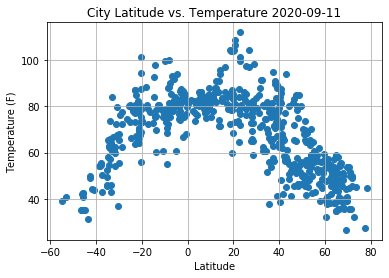

In [157]:
plt.scatter(weather_data['Latitude'], weather_data['Max Temp'])
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
print(f"Temperature plot creates a curve that shows how the temperature increase as you move closer to the equator.")
plt.savefig('lat_temp.png', bbox_inches='tight')

In [ ]:
## Latitude vs. Humidity Plot

Humidity appears to be higher away from the equator in the southern hemisphere.


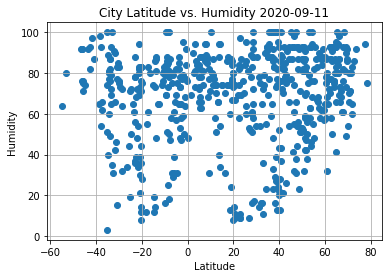

In [144]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'])
plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
print(f"Humidity appears to be higher away from the equator in the southern hemisphere.")
plt.savefig('lat_humid.png', bbox_inches='tight')

## Latitude vs. Cloudiness Plot

Cloudiness appears to be widespread across the plot.


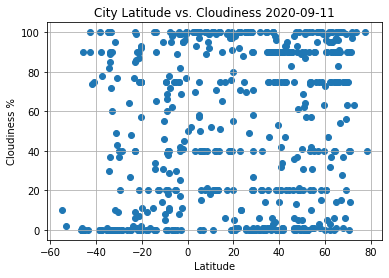

In [143]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)
print(f"Cloudiness appears to be widespread across the plot.")
plt.savefig('lat_cloud.png', bbox_inches='tight')

## Latitude vs. Wind Speed Plot

Wind speed data is widely spread across the plot.


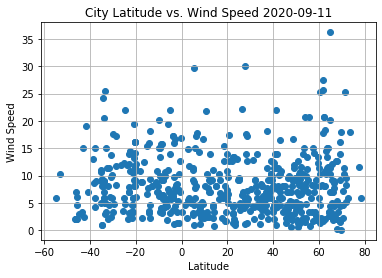

In [142]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
print(f"Wind speed data is widely spread across the plot.")
plt.savefig('lat_wind.png', bbox_inches='tight')

## Linear Regression

In [53]:
#create northern and southern hemisphere dataframes
northern_df = weather_data.loc[weather_data["Latitude"] >= 0]
southern_df = weather_data.loc[weather_data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [138]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Temps increase as you get closer to the equator.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.78
Regression line equation is: y = -0.7x + 94.02
Temps increase as you get closer to the equator.


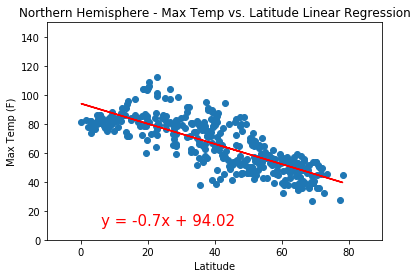

In [139]:
equation = linear_agression(northern_df["Latitude"], northern_df["Max Temp"])

# title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(-10, 90)
plt.ylim(0, 150)

# Save the figure
plt.savefig('northern_hemisphere_lat_temp.png', bbox_inches='tight')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76
Regression line equation is: y = 0.84x + 88.02
As expected, the temp increases the closer you get to the equater


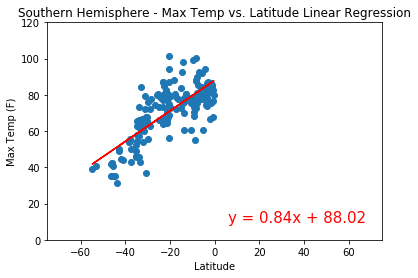

In [129]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"As expected, the temp increases the closer you get to the equater.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(southern_df["Latitude"], southern_df["Max Temp"])

# title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(-75, 75)
plt.ylim(0, 120)

# Save the figure
plt.savefig('southern_hemisphere_maxtemp.png', bbox_inches='tight')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09
Regression line equation is: y = 0.08x + 34.39
Humidity increases the further you get from the equater according to the plot below.


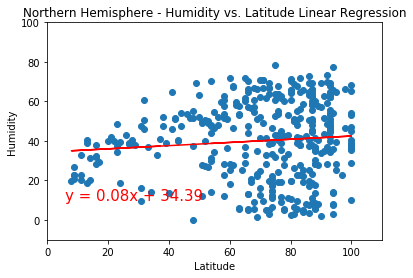

In [131]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Humidity increases the further you get from the equater according to the plot below.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(northern_df["Humidity"], northern_df["Latitude"])

# title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(0, 110)
plt.ylim(-10, 100)

# Save the figure
plt.savefig('northern_hemisphere_lat_humid.png', bbox_inches='tight')    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.1
Regression line equation is: y = -0.06x + -16.59
Southern Hemisphere humidity percentage appears to be much lower than the northern.


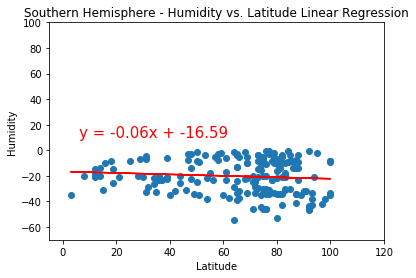

In [132]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Southern Hemisphere humidity percentage appears to be much lower than the northern.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(southern_df["Humidity"], southern_df["Latitude"])

# title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-5, 120)
plt.ylim(-70, 100)

# Save the figure
plt.savefig('southeren_hemishpere_lat_humid.png', bbox_inches='tight')    

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.02
Regression line equation is: y = 0.01x + 39.45
Appears to be no correlation.


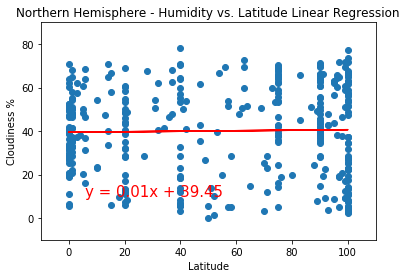

In [133]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Appears to be no correlation.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(northern_df["Cloudiness"], northern_df["Latitude"])

# title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-10, 110)
plt.ylim(-10, 90)

# Save the figure
plt.savefig('northern_hemisphere_lat_cloudiness.png', bbox_inches='tight')    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.18
Regression line equation is: y = 0.06x + -22.97
Appears to be a postive correlation the further you get away from the equator.


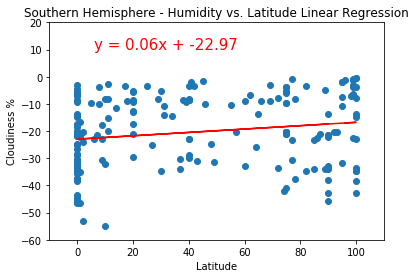

In [134]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Appears to be a postive correlation the further you get away from the equator.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(southern_df["Cloudiness"], southern_df["Latitude"])

# title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-10, 110)
plt.ylim(-60, 20)

# Save the figure
plt.savefig('southern_hemisphere_lat_cloudiness.png', bbox_inches='tight') 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09
Regression line equation is: y = 0.32x + 37.6
Appears to be higher wind speeds closer ot the equater in the northern hemisphere.


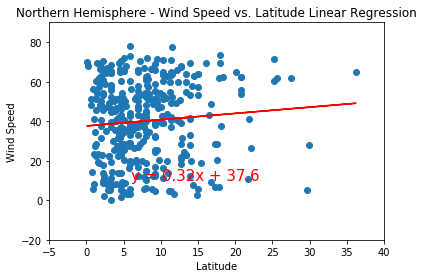

In [135]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Appears to be higher wind speeds closer ot the equater in the northern hemisphere.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(northern_df["Wind Speed"], northern_df["Latitude"])

# title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-5, 40)
plt.ylim(-20, 90)

# Save the figure
plt.savefig('northern_hemisphere_lat_windspeed.png', bbox_inches='tight') 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.06
Regression line equation is: y = 0.16x + -21.77
Wind speeds appear to be uniform regardless of proximity of closeness to equator.


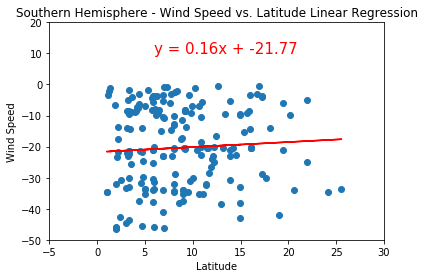

In [136]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"Regression line equation is: {line_eq}")
    print(f"Wind speeds appear to be uniform regardless of proximity of closeness to equator.")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    
equation = linear_agression(southern_df["Wind Speed"], southern_df["Latitude"])

# title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-5, 30)
plt.ylim(-50, 20)

# Save the figure
plt.savefig('southeren_hemisphere_lat_windspeed.png', bbox_inches='tight') 